In [1]:
# 回忆前面的例子
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed= 666
X = np.empty((100,2))
X[:, 0] = np.random.uniform(0., 100., size=100)
X[:, 1] = 0.75 * X[:, 0] + 3. + np.random.normal(0, 5, size=100)

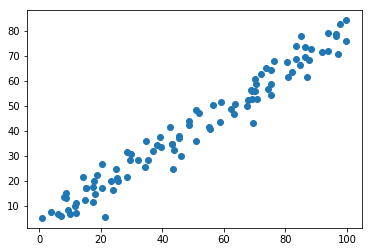

In [3]:
plt.scatter(X[:, 0], X[:, 1])

In [4]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
pca.fit(X)
X_reduction = pca.transform(X)
X_restore = pca.inverse_transform(X_reduction)

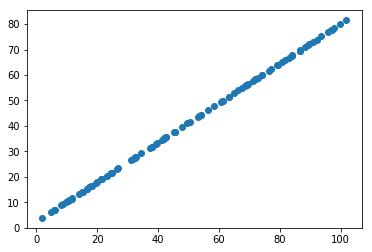

In [5]:
plt.scatter(X_restore[:, 0],X_restore[:, 1])

In [6]:
# 我们丢失了一部分信息 但是丢掉的可能就是噪音

# 手写识别的例子

In [7]:
from sklearn import datasets

In [8]:
digits = datasets.load_digits()
X = digits.data
y = digits.target

In [9]:
noisy_digits = X + np.random.normal(0, 4, size=X.shape)

In [10]:
X.shape

(1797, 64)

In [11]:
# 原来的X是一些数据的每个像素的值  

In [12]:
# 当真实值是0的前10个X样本 (有噪声)
example_digits = noisy_digits[y==0, :][:10]

for num in range(1, 10):
    X_num = noisy_digits[y==num,:][:10]
    example_digits = np.vstack([example_digits, X_num])

In [13]:
example_digits.shape

(100, 64)

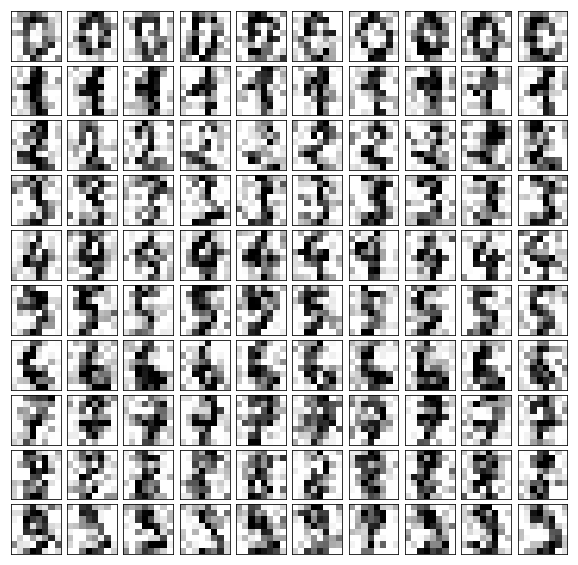

In [14]:
# 每个数字有10个样本(都有噪声)
# 绘制这些数字
def plot_digits(data):
    fig, axes = plt.subplots(10, 10, figsize=(10,10),
                             subplot_kw={"xticks":[], "yticks":[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i , ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8,8), cmap="binary", 
                  interpolation="nearest",
                 clim=(0,16))
    plt.show()
plot_digits(example_digits)

In [15]:
# 可以看到这些都有噪音
# 使用PCA降噪
# 噪音比较多时, 调低这个值
pca = PCA(0.4)
pca.fit(noisy_digits)
digits_red = pca.transform(example_digits)
digits_restore = pca.inverse_transform(digits_red)

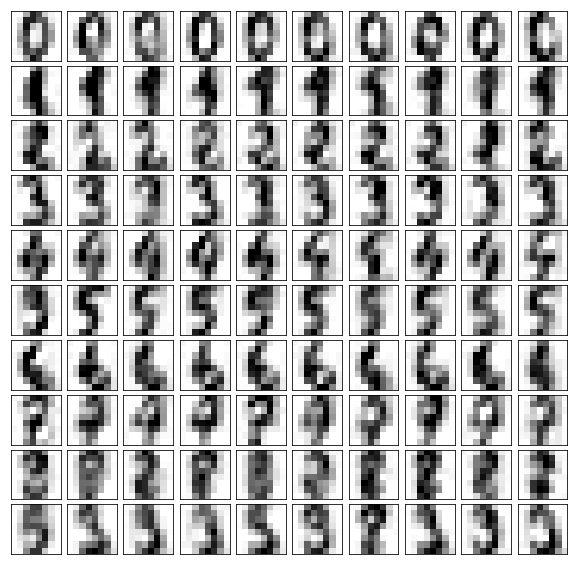

In [16]:
plot_digits(digits_restore)

# 人脸识别 特征脸的应用
![renlian](img/renlian.png)

In [17]:
from sklearn.datasets import fetch_lfw_people

In [52]:
# load local faces
# 
#faces = fetch_lfw_people(data_home="lfw_funneled")
# from network
faces = fetch_lfw_people()

In [53]:
faces.keys() 

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])

In [54]:
faces.target_names

array(['AJ Cook', 'AJ Lamas', 'Aaron Eckhart', ..., 'Zumrati Juma',
       'Zurab Tsereteli', 'Zydrunas Ilgauskas'], dtype='<U35')

In [55]:
faces.data.shape

(13233, 2914)

In [56]:
faces.images.shape

(13233, 62, 47)

In [57]:
random_indexes = np.random.permutation(len(faces.data))

In [58]:
X = faces.data[random_indexes]

In [59]:
example_faces = X[:36]

In [61]:
example_faces.shape

(36, 2914)

In [65]:
def plot_faces(faces):
    fig, axes = plt.subplots(6,6, figsize=(10, 10),
                            subplot_kw={"xticks":[], "yticks":[]},
                            gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i , ax in enumerate(axes.flat):
        ax.imshow(faces[i].reshape(62,47), cmap="bone")
    plt.show()

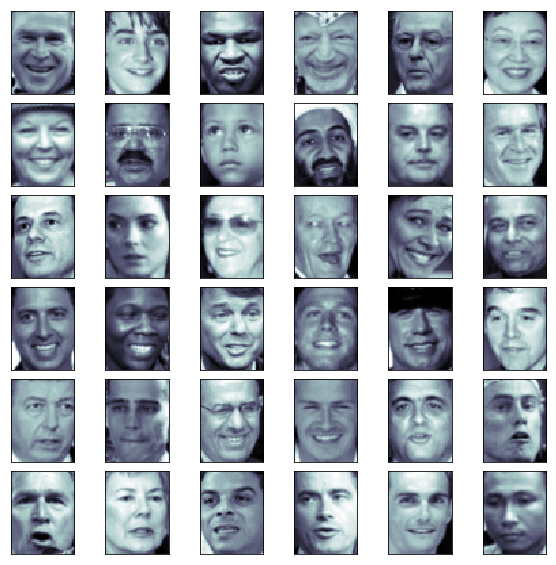

In [66]:
plot_faces(example_faces)

In [67]:
#特征脸就是组成分组成的矩阵中 每一行就是一个特征脸

In [68]:
from sklearn.decomposition import PCA
pca = PCA(svd_solver="randomized")
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='randomized', tol=0.0, whiten=False)

In [69]:
pca.components_.shape

# 下载那些包含脸比较多的数据

(2914, 2914)

In [70]:
faces = fetch_lfw_people(min_faces_per_person=60)

In [71]:
faces.target_names

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Junichiro Koizumi',
       'Tony Blair'], dtype='<U17')